# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: UK (^FTSE)

In [1]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [2]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method 

**Reading the datas (Source: Yahoo Finance)**

In [3]:
getSymbols("^FTSE", from = '2000-01-01', to = '2021-05-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^FTSE contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^FTSE"

**Checking data frequency**

In [4]:
periodicity(FTSE)        

Daily periodicity from 2000-01-04 to 2021-05-28 

**Identifying missing values (%)**

In [5]:
round(prop.table(table(is.na(FTSE)))*100, digits = 2)       


FALSE  TRUE 
98.83  1.17 

**Removing missing values**

In [6]:
FTSE <- na.omit(FTSE)    
round(prop.table(table(is.na(FTSE)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [7]:
FTSE.df <- FTSE[,'FTSE.Close']                              
head(FTSE.df)

           FTSE.Close
2000-01-04     6665.9
2000-01-05     6535.9
2000-01-06     6447.2
2000-01-07     6504.8
2000-01-10     6607.7
2000-01-11     6518.9

**Calculating log-returns**

In [8]:
logreturn <- diff(log(FTSE.df$FTSE.Close))*100                     
head(logreturn)

           FTSE.Close
2000-01-04         NA
2000-01-05 -1.9694921
2000-01-06 -1.3664084
2000-01-07  0.8894378
2000-01-10  1.5695329
2000-01-11 -1.3530030

**Aggregating the data**

In [9]:
FTSE.df$FTSE.Return <- logreturn                  
FTSE.df <- na.omit(FTSE.df)
head(FTSE.df)

           FTSE.Close FTSE.Return
2000-01-05     6535.9  -1.9694921
2000-01-06     6447.2  -1.3664084
2000-01-07     6504.8   0.8894378
2000-01-10     6607.7   1.5695329
2000-01-11     6518.9  -1.3530030
2000-01-12     6532.8   0.2129977

**Identifying missing values (%)**

In [10]:
round(prop.table(table(is.na(FTSE.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [11]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



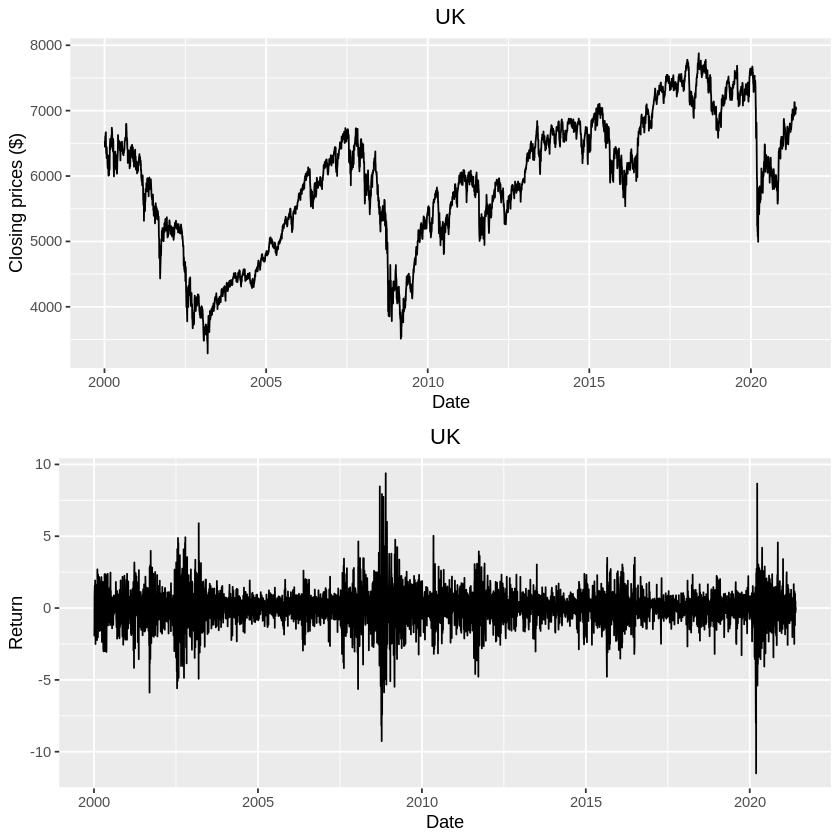

In [12]:
# Price chart
graph1 <- ggplot(FTSE.df,
                aes(x = index(FTSE.df), y = FTSE.df[,'FTSE.Close'])) +
                geom_line(color = "black") +
                ggtitle("UK") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(FTSE.df,
                aes(x = index(FTSE.df), y = FTSE.df[,'FTSE.Return'])) +
                geom_line(color = "black") +
                ggtitle("UK") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [13]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




**Descriptive statistic**

In [14]:
# mean
round(mean(FTSE.df$FTSE.Return), 3)                         

[1] 0.001

In [15]:
# sd
round(sd(FTSE.df$FTSE.Return), 3)                           

[1] 1.196

In [16]:
# skewness
round(skewness(FTSE.df$FTSE.Return), 3)                     

FTSE.Return 
     -0.323

In [17]:
# kurtosis
round(kurtosis(FTSE.df$FTSE.Return), 3)                     

FTSE.Return 
     10.814

In [18]:
# min
round(min(FTSE.df$FTSE.Return), 3)                          

[1] -11.512

In [19]:
# p5
round(quantile(FTSE.df$FTSE.Return, probs = 0.05), 3)       

5% 
-1.883

In [20]:
# p25
round(quantile(FTSE.df$FTSE.Return, probs = 0.25), 3)       

25% 
-0.545

In [21]:
# median
round(median(FTSE.df$FTSE.Return), 3)                       

[1] 0.039

In [22]:
# p75
round(quantile(FTSE.df$FTSE.Return, probs = 0.75), 3)       

75% 
0.591

In [23]:
# p95
round(quantile(FTSE.df$FTSE.Return, probs = 0.95), 3)       

95% 
1.791

In [24]:
# max
round(max(FTSE.df$FTSE.Return), 3)                          

[1] 9.384

In [25]:
# n observations
length(FTSE.df$FTSE.Return)                                 

[1] 5393

## 4. Series normality analysis

In [26]:
# Package
library(tseries)

In [27]:
jarque.bera.test(FTSE.df$FTSE.Return)


	Jarque Bera Test

data:  FTSE.df$FTSE.Return
X-squared = 13815, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [28]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

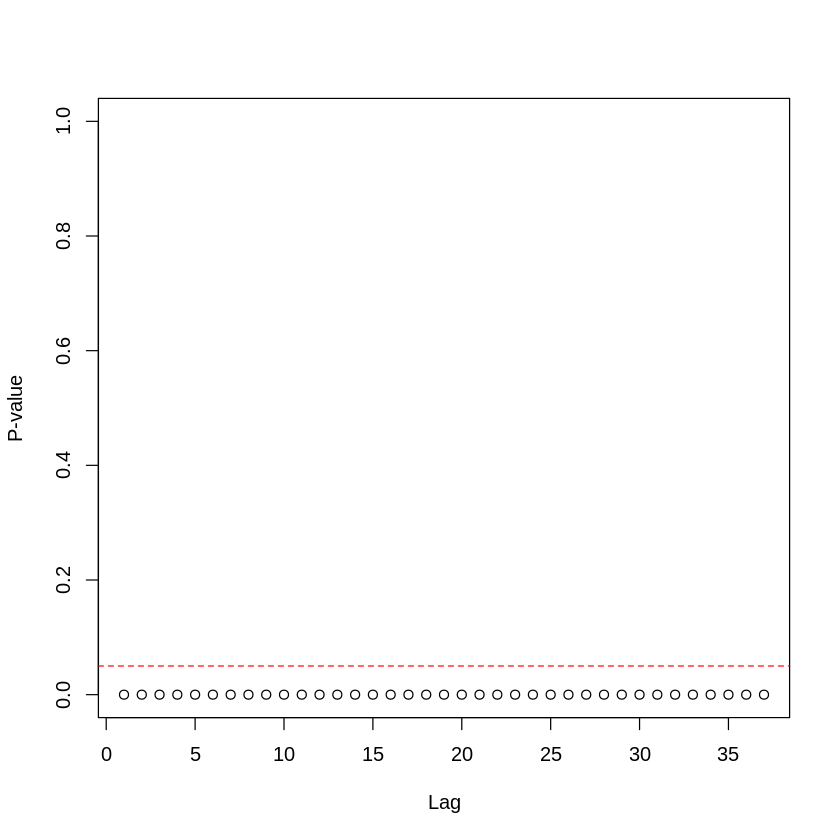

In [29]:
McLeod.Li.test(y = FTSE.df$FTSE.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [30]:
ArchTest(FTSE.df$FTSE.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  FTSE.df$FTSE.Return
Chi-squared = 1139.7, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [31]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks 

In [32]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [33]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [34]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = FTSE.df$FTSE.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0277,0.0110,2.5205,0.0117
omega,0.0180,0.0032,5.7039,0.0000
alpha1,0.1096,0.0097,11.2536,0.0000
beta1,0.8766,0.0106,82.6498,0.0000
skew,0.8803,0.0154,57.0217,0.0000


In [35]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

FTSE.df$FTSE.VolGARCH <- as.numeric(var.garch)
head(FTSE.df)

[1] 1.431234 1.709884 1.729926 1.615821 1.694997 1.712798

           FTSE.Close FTSE.Return FTSE.VolGARCH
2000-01-05     6535.9  -1.9694921      1.431234
2000-01-06     6447.2  -1.3664084      1.709884
2000-01-07     6504.8   0.8894378      1.729926
2000-01-10     6607.7   1.5695329      1.615821
2000-01-11     6518.9  -1.3530030      1.694997
2000-01-12     6532.8   0.2129977      1.712798

**EGARCH model**

In [36]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [37]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = FTSE.df$FTSE.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-0.0142,0.0104,-1.3683,0.1712
omega,0.0013,0.0020,0.6538,0.5132
alpha1,-0.1252,0.0065,-19.2880,0.0000
beta1,0.9820,0.0008,1251.6403,0.0000
gamma1,0.1150,0.0105,10.9063,0.0000
skew,0.8598,0.0155,55.4028,0.0000


In [38]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

FTSE.df$FTSE.VolEGARCH <- as.numeric(var.egarch)
head(FTSE.df)

[1] 1.430749 1.923120 2.194380 1.963975 1.751944 2.020003

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749
2000-01-06     6447.2  -1.3664084      1.709884       1.923120
2000-01-07     6504.8   0.8894378      1.729926       2.194380
2000-01-10     6607.7   1.5695329      1.615821       1.963975
2000-01-11     6518.9  -1.3530030      1.694997       1.751944
2000-01-12     6532.8   0.2129977      1.712798       2.020003

**GJR-GARCH model**

In [39]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [40]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = FTSE.df$FTSE.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-0.0103,0.0111,-0.9263,0.3543
omega,0.0195,0.0027,7.1728,0.0000
alpha1,0.0000,0.0073,0.0000,1.0000
beta1,0.8997,0.0095,94.4880,0.0000
gamma1,0.1650,0.0144,11.4935,0.0000
skew,0.8633,0.0155,55.7649,0.0000


In [41]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

FTSE.df$FTSE.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(FTSE.df)

[1] 1.430645 1.939904 2.068285 1.880439 1.711428 1.856751

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194380         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694997       1.751944         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020003         1.856751

## 7. Realized GARCH model estimation

In [42]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [43]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, FTSE.df$FTSE.Return,
                          solver = 'hybrid',
                          realizedVol = FTSE.df$FTSE.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0152,0.0189,0.8078,0.4192
alpha1,0.9847,0.0264,37.2593,0.0000
beta1,0.0099,0.0138,0.7149,0.4747
eta11,0.0030,0.0020,1.4899,0.1363
eta21,0.0089,0.0012,7.6141,0.0000
delta,0.9888,0.0227,43.5198,0.0000
lambda,0.1477,0.0014,103.8556,0.0000
skew,0.8812,0.0151,58.4344,0.0000
xi,-0.0167,0.0187,-0.8917,0.3725


In [44]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

FTSE.df$FTSE.VolRealGARCH <- as.numeric(var.realgarch)
head(FTSE.df)

[1] 1.430519 1.450372 1.728273 1.751244 1.637655 1.715508

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194380         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694997       1.751944         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020003         1.856751
           FTSE.VolRealGARCH
2000-01-05          1.430519
2000-01-06          1.450372
2000-01-07          1.728273
2000-01-10          1.751244
2000-01-11          1.637655
2000-01-12          1.715508

**Realized EGARCH**

In [45]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, FTSE.df$FTSE.Return,
                            solver = 'hybrid',
                            realizedVol = FTSE.df$FTSE.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0165,0.0191,0.8636,0.3878
alpha1,1.0000,0.0250,40.0360,0.0000
beta1,0.0000,0.0138,0.0000,1.0000
eta11,0.0059,0.0021,2.7923,0.0052
eta21,0.0127,0.0012,10.2683,0.0000
delta,0.9826,0.0203,48.3400,0.0000
lambda,0.1514,0.0015,103.8473,0.0000
skew,0.8658,0.0153,56.6429,0.0000
xi,-0.0183,0.0186,-0.9867,0.3238


In [46]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

FTSE.df$FTSE.VolRealEGARCH <- as.numeric(var.realegarch)
head(FTSE.df)

[1] 1.430519 1.454526 1.955075 2.230840 1.996609 1.781056

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194380         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694997       1.751944         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020003         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH
2000-01-05          1.430519           1.430519
2000-01-06          1.450372           1.454526
2000-01-07          1.728273           1.955075
2000-01-10          1.751244           2.230840
2000-01-11          1.637655           1.996609
2000-01-12          1.715508           1.781056

**Realized GJR-GARCH**

In [47]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, FTSE.df$FTSE.Return,
                              solver = 'hybrid',
                              realizedVol = FTSE.df$FTSE.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0150,0.0191,0.7864,0.4316
alpha1,0.9799,0.0257,38.1777,0.0000
beta1,0.0000,0.0139,0.0000,1.0000
eta11,0.0056,0.0023,2.4091,0.0160
eta21,0.0142,0.0014,10.3682,0.0000
delta,0.9996,0.0222,45.0433,0.0000
lambda,0.1669,0.0016,103.8453,0.0000
skew,0.8680,0.0152,56.9489,0.0000
xi,-0.0174,0.0189,-0.9198,0.3577


In [48]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

FTSE.df$FTSE.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(FTSE.df)

[1] 1.430519 1.441898 1.943238 2.069174 1.884849 1.718691

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194380         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694997       1.751944         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020003         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-05          1.430519           1.430519             1.430519
2000-01-06          1.450372           1.454526             1.441898
2000-01-07          1.728273           1.955075             1.943238
2000-01-10          1.751244           2.230840             2.069174
2000-01-11          1.637655           1.996609             1.884849
2000-01-12          1.7155

## 8. Markov-Switching GARCH estimation

In [49]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [50]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [51]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = FTSE.df$FTSE.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0026     0.0007   3.5292 2.084e-04
alpha1_1   0.0098     0.0045   2.1941 1.412e-02
beta_1     0.9787     0.0019 504.1387    <1e-16
xi_1       0.9659     0.0317  30.4766    <1e-16
alpha0_2   0.0654     0.0201   3.2491 5.789e-04
alpha1_2   0.1272     0.0639   1.9915 2.321e-02
beta_2     0.8595     0.0072 119.3165    <1e-16
xi_2       0.8501     0.0319  26.6428    <1e-16
P_1_1      0.9704     0.0163  59.5832    <1e-16
P_2_1      0.0469     0.0097   4.8568 5.966e-07
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [52]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

FTSE.df$FTSE.VolMSGARCH <- as.numeric(var.msgarch)
head(FTSE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.424779 1.414919 1.842387 1.725783 1.885482 1.827492

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194380         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694997       1.751944         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020003         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-05          1.430519           1.430519             1.430519
2000-01-06          1.450372           1.454526             1.441898
2000-01-07          1.728273           1.955075             1.943238
2000-01-10          1.751244           2.230840             2.069174
2000-01-11          1.637655           1.996609             1.884849
2000-01-12          1.7155

**MS EGARCH**

In [53]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [54]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = FTSE.df$FTSE.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0112     0.0023  -4.9797 3.183e-07
alpha1_1   0.0748     0.0152   4.9119 4.510e-07
alpha2_1  -0.1408     0.0132 -10.6679    <1e-16
beta_1     0.9868     0.0022 444.2520    <1e-16
xi_1       0.8725     0.0239  36.5156    <1e-16
alpha0_2   0.0239     0.0071   3.3603 3.893e-04
alpha1_2   0.0633     0.0227   2.7876 2.655e-03
alpha2_2  -0.1583     0.0262  -6.0470 7.378e-10
beta_2     0.9813     0.0053 185.9662    <1e-16
xi_2       0.8220     0.0446  18.4253    <1e-16
P_1_1      0.9691     0.0661  14.6550    <1e-16
P_2_1      0.1398     0.0169   

In [55]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

FTSE.df$FTSE.VolMSEGARCH <- as.numeric(var.msegarch)
head(FTSE.df)

t=1       t=2       t=3       t=4       t=5       t=6 
0.9996194 1.1866476 1.3023449 1.1580736 1.1574857 1.2777177

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194380         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694997       1.751944         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020003         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-05          1.430519           1.430519             1.430519
2000-01-06          1.450372           1.454526             1.441898
2000-01-07          1.728273           1.955075             1.943238
2000-01-10          1.751244           2.230840             2.069174
2000-01-11          1.637655           1.996609             1.884849
2000-01-12          1.7155

**MS GJR-GARCH**

In [56]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [57]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = FTSE.df$FTSE.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error      t value  Pr(>|t|)
alpha0_1   0.0157     0.0034 4.605600e+00 2.057e-06
alpha1_1   0.0000     0.0001 2.500000e-02 4.900e-01
alpha2_1   0.2606     0.0395 6.595600e+00 2.118e-11
beta_1     0.8359     0.0081 1.025879e+02    <1e-16
xi_1       0.8631     0.0285 3.032120e+01    <1e-16
alpha0_2   0.0036     0.0013 2.676300e+00 3.722e-03
alpha1_2   0.0000     0.0001 1.670000e-02 4.934e-01
alpha2_2   0.0276     0.0087 3.189900e+00 7.116e-04
beta_2     0.9838     0.0008 1.173371e+03    <1e-16
xi_2       0.8231     0.0395 2.082090e+01    <1e-16
P_1_1      0.5544     0.0000 3.

In [58]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

FTSE.df$FTSE.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(FTSE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.170894 1.424627 1.487652 1.419725 1.336997 1.427413

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194380         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694997       1.751944         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020003         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-05          1.430519           1.430519             1.430519
2000-01-06          1.450372           1.454526             1.441898
2000-01-07          1.728273           1.955075             1.943238
2000-01-10          1.751244           2.230840             2.069174
2000-01-11          1.637655           1.996609             1.884849
2000-01-12          1.7155

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [59]:
# Total number of lines 
nrow(FTSE.df)                

[1] 5393

In [60]:
# Cut-line
round(nrow(FTSE.df)*0.7, digits = 0)

[1] 3775

In [61]:
# In-sample
FTSE.df.in <- FTSE.df[1:round(nrow(FTSE.df)*0.7, digits = 0),]
dim(FTSE.df.in)

[1] 3775   11

In [62]:
# Out-sample
FTSE.df.out <- FTSE.df[(round(nrow(FTSE.df)*0.7, digits = 0)+1):nrow(FTSE.df),]
dim(FTSE.df.out)

[1] 1618   11

# 10. Forecast - GARCH models

In [63]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [64]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [65]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            FTSE.df$FTSE.Return,
                            out.sample = dim(FTSE.df.out)[1])

In [66]:
# Forecast calculated through adjustment
garch.pred.a <- ugarchforecast(garch.fit.pred,
                               n.ahead = 1,
                               n.roll = dim(FTSE.df.out)[1])

garch.forecast.a <- xts(sigma(garch.pred.a)[1,],
                       move(as.Date(names(sigma(garch.pred.a)[1,])), by = 1))

In [67]:
# Forecast calculated using specification
garch.pred.b <- ugarchforecast(garch.spec.pred,
                               n.ahead = 1,
                               n.roll = dim(FTSE.df.out)[1],
                               data = FTSE.df$FTSE.Return,
                               out.sample = dim(FTSE.df.out)[1])

garch.forecast.b <- xts(sigma(garch.pred.b)[1,],
                        move(as.Date(names(sigma(garch.pred.b)[1,])), by = 1))  

In [68]:
# Model filtering
garch.filt.pred <- ugarchfilter(garch.spec.pred,
                                data = FTSE.df$FTSE.Return,
                                n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1])

garch.filt <- tail(sigma(garch.filt.pred), dim(FTSE.df.out)[1])                                 

In [69]:
# Comparative
colnames(garch.filt) <- 'filter'
colnames(garch.forecast.a) <- 'forecast1'
colnames(garch.forecast.b) <- 'forecast2'

garch.ftest <- cbind(garch.filt,
                    garch.forecast.a,
                    garch.forecast.b)
head(round(garch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.2217    1.2331    1.2217
2015-01-02 1.2342    1.2431    1.2342
2015-01-05 1.1633    1.1788    1.1633
2015-01-06 1.2890    1.2912    1.2890
2015-01-07 1.2444    1.2505    1.2444
2015-01-08 1.2027    1.2142    1.2027

In [70]:
sigma.garch.pred.a <- ts(garch.forecast.a[-1,])
sigma.garch.pred.b <- ts(garch.forecast.b[-1,])
sigma.garch.true <- ts(FTSE.df.out$FTSE.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred.a, 
                            sigma.garch.pred.b,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred.a,sigma.garch.pred.b,sigma.garch.true
1,1.243148,1.234238,1.492631
2,1.178820,1.163339,1.523344
3,1.291181,1.289049,1.353358
4,1.250548,1.244367,1.661647
5,1.214200,1.202727,1.548449
6,1.364493,1.363226,1.446552


**Performance evaluation**

In [71]:
# Forecast Error - Forecast a
garch.error.a <- sigma.garch[,'sigma.garch.pred.a'] - sigma.garch[,'sigma.garch.true']
head(garch.error.a)

A Time Series:
[1] -0.24948305 -0.34452373 -0.06217682 -0.41109879 -0.33424910 -0.08205877

In [72]:
# Forecast Error - Forecast b
garch.error.b <- sigma.garch[,'sigma.garch.pred.b'] - sigma.garch[,'sigma.garch.true']
head(garch.error.b)

A Time Series:
[1] -0.25839266 -0.36000450 -0.06430931 -0.41727999 -0.34572222 -0.08332621

In [73]:
# Mean Square Error Loss - Forecast a
garch.mse.a <- MSE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.a, digits = 3)     

[1] 2.343

In [74]:
# Mean Square Error Loss - Forecast b
garch.mse.b <- MSE(sigma.garch[,'sigma.garch.pred.b'],
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.b, digits = 3) 

[1] 2.367

In [75]:
# Mean Absolute Error Loss - Forecast a
garch.mae.a <- MAE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.a, digits = 3)

[1] 0.473

In [76]:
# Mean Absolute Error Loss - Forecast b
garch.mae.b <- MAE(sigma.garch[,'sigma.garch.pred.b'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.b, digits = 3)

[1] 0.48

In [77]:
# Root Mean Square Error Loss - Forecast a
garch.rmse.a <- RMSE(sigma.garch[,'sigma.garch.pred.a'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.a, digits = 3)

[1] 1.531

In [78]:
# Root Mean Square Error Loss - Forecast b
garch.rmse.b <- RMSE(sigma.garch[,'sigma.garch.pred.b'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.b, digits = 3)

[1] 1.539

In [79]:
# Quasi-likelihood loss function - forecast a
h <- sigma.garch[,'sigma.garch.true']

h.hat.a <- sigma.garch[,'sigma.garch.pred.a']     
garch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(garch.qlike.a, digits = 5) 

[1] 0.89394

In [80]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.garch[,'sigma.garch.pred.b']
garch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(garch.qlike.b, digits = 5)   

[1] 0.89276

In [81]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.garch[,'sigma.garch.pred.a']
f.b <- sigma.garch[,'sigma.garch.pred.b']
y <- sigma.garch[,'sigma.garch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -4.3619, forecast horizon = 1, p-value = 1.29e-05
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [82]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- garch.error.a
e.b <- garch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -4.3605, Forecast horizon = 1, Loss function power = 2, p-value =
1.379e-05
alternative hypothesis: two.sided


In [83]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
garch.qlike.a <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.a'],
                              which = "QLIKE"))
round(garch.qlike.a, digits = 3)

[1] 0.994

In [84]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike.b <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.b'],
                              which = "QLIKE"))
round(garch.qlike.b, digits = 3)

[1] 1.013

In [85]:
# Log loss / Cross-Entropy Loss -  forecast a
garch.logloss.a <- LogLoss(sigma.garch[,'sigma.garch.pred.a'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.a, digits = 3)

[1] -16.552

In [86]:
# Log loss / Cross-Entropy Loss -  forecast b
garch.logloss.b <- LogLoss(sigma.garch[,'sigma.garch.pred.b'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.b, digits = 3)

[1] -16.529

In [87]:
# Linear regression to assess forecast performance - forecast a
garch.model.a <- lm(sigma.garch.true ~ sigma.garch.pred.a, 
                    data = sigma.garch)
round(coeftest(garch.model.a, NeweyWest(garch.model.a,
                                        lag = bwNeweyWest(garch.model.a),
                                        prewhite = F)), 3)
round(summary(garch.model.a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.252      0.442  -5.093 < 2.2e-16 ***
sigma.garch.pred.a    3.531      0.494   7.145 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.845

In [88]:
# Linear regression to assess forecast performance - forecast b
garch.model.b <- lm(sigma.garch.true ~ sigma.garch.pred.b, 
                    data = sigma.garch)
round(coeftest(garch.model.b, NeweyWest(garch.model.b,
                                        lag = bwNeweyWest(garch.model.b),
                                        prewhite = F)), 3)
round(summary(garch.model.b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.308      0.439  -5.253 < 2.2e-16 ***
sigma.garch.pred.b    3.606      0.493   7.316 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.849

##(b) EGARCH

**Forecast**

In [89]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [90]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             FTSE.df$FTSE.Return,
                             out.sample = dim(FTSE.df.out)[1])

In [91]:
# Forecast calculated through adjustment
egarch.pred.a <- ugarchforecast(egarch.fit.pred,
                                n.ahead = 1,
                                n.roll = dim(FTSE.df.out)[1])

egarch.forecast.a <- xts(sigma(egarch.pred.a)[1,],
                         move(as.Date(names(sigma(egarch.pred.a)[1,])), by = 1))

In [92]:
# Forecast calculated using specification
egarch.pred.b <- ugarchforecast(egarch.spec.pred,
                                n.ahead = 1,
                                n.roll = dim(FTSE.df.out)[1],
                                data = FTSE.df$FTSE.Return,
                                out.sample = dim(FTSE.df.out)[1])

egarch.forecast.b <- xts(sigma(egarch.pred.b)[1,],
                         move(as.Date(names(sigma(egarch.pred.b)[1,])), by = 1))               

In [93]:
# Model filtering
egarch.filt.pred <- ugarchfilter(egarch.spec.pred,
                                data = FTSE.df$FTSE.Return,
                                n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1])

egarch.filt <- tail(sigma(egarch.filt.pred), dim(FTSE.df.out)[1]) 

In [94]:
# Comparative
colnames(egarch.filt) <- 'filter'
colnames(egarch.forecast.a) <- 'forecast1'
colnames(egarch.forecast.b) <- 'forecast2'

egarch.ftest <- cbind(egarch.filt, 
                      egarch.forecast.a,
                      egarch.forecast.b)
head(round(egarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.0427    1.0483    1.0427
2015-01-02 1.1565    1.1611    1.1565
2015-01-05 1.1023    1.1064    1.1023
2015-01-06 1.3078    1.3107    1.3078
2015-01-07 1.3362    1.3390    1.3362
2015-01-08 1.2663    1.2700    1.2663

In [95]:
sigma.egarch.pred.a <- ts(egarch.forecast.a[-1,])
sigma.egarch.pred.b <- ts(egarch.forecast.b[-1,])
sigma.egarch.true <- ts(FTSE.df.out$FTSE.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred.a,
                              sigma.egarch.pred.b,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred.a,sigma.egarch.pred.b,sigma.egarch.true
1,1.161110,1.156500,1.087299
2,1.106410,1.102287,1.337492
3,1.310738,1.307847,1.215037
4,1.338989,1.336197,1.710463
5,1.270031,1.266293,1.785422
6,1.200400,1.193850,1.603497


**Performance evaluation**

In [96]:
# Forecast Error - Forecast a
egarch.error.a <- sigma.egarch[,'sigma.egarch.pred.a'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.a)

A Time Series:
[1]  0.07381097 -0.23108251  0.09570126 -0.37147384 -0.51539181 -0.40309723

In [97]:
# Forecast Error - Forecast b
egarch.error.b <- sigma.egarch[,'sigma.egarch.pred.b'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.b)

A Time Series:
[1]  0.06920123 -0.23520503  0.09280954 -0.37426619 -0.51912968 -0.40964758

In [98]:
# Mean Square Error Loss - Forecast a
egarch.mse.a <- MSE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.a, digits = 3)     

[1] 1.533

In [99]:
# Mean Square Error Loss - Forecast b
egarch.mse.b <- MSE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.b, digits = 3) 

[1] 1.548

In [100]:
# Mean Absolute Error Loss - Forecast a
egarch.mae.a <- MAE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.a, digits = 3)

[1] 0.411

In [101]:
# Mean Absolute Error Loss - Forecast b
egarch.mae.b <- MAE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.b, digits = 3)

[1] 0.414

In [102]:
# Root Mean Square Error Loss - Forecast a
egarch.rmse.a <- RMSE(sigma.egarch[,'sigma.egarch.pred.a'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.a, digits = 3)

[1] 1.238

In [103]:
# Root Mean Square Error Loss - Forecast b
egarch.rmse.b <- RMSE(sigma.egarch[,'sigma.egarch.pred.b'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.b, digits = 3)

[1] 1.244

In [104]:
# Quasi-likelihood loss function - forecast a
h <- sigma.egarch[,'sigma.egarch.true']

h.hat.a <- sigma.egarch[,'sigma.egarch.pred.a']     
egarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(egarch.qlike.a, digits = 5) 

[1] 0.88249

In [105]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.egarch[,'sigma.egarch.pred.b']
egarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(egarch.qlike.b, digits = 5) 

[1] 0.88046

In [106]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.egarch[,'sigma.egarch.pred.a']
f.b <- sigma.egarch[,'sigma.egarch.pred.b']
y <- sigma.egarch[,'sigma.egarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -6.7804, forecast horizon = 1, p-value = 1.198e-11
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [107]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- egarch.error.a
e.b <- egarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -6.7784, Forecast horizon = 1, Loss function power = 2, p-value =
1.698e-11
alternative hypothesis: two.sided


In [108]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
egarch.qlike.a <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.a'],
                              which = "QLIKE"))
round(egarch.qlike.a, digits = 3)

[1] 0.906

In [109]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
egarch.qlike.b <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.b'],
                              which = "QLIKE"))
round(egarch.qlike.b, digits = 3)

[1] 0.916

In [110]:
# Log loss / Cross-Entropy Loss -  forecast a
egarch.logloss.a <- LogLoss(sigma.egarch[,'sigma.egarch.pred.a'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.a, digits = 3)

[1] -13.979

In [111]:
# Log loss / Cross-Entropy Loss -  forecast b
egarch.logloss.b <- LogLoss(sigma.egarch[,'sigma.egarch.pred.b'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.b, digits = 3)

[1] -13.967

In [112]:
# Linear regression to assess forecast performance - forecast a
egarch.model.a <- lm(sigma.egarch.true ~ sigma.egarch.pred.a, 
                    data = sigma.egarch)
round(coeftest(egarch.model.a, NeweyWest(egarch.model.a,
                                        lag = bwNeweyWest(egarch.model.a),
                                        prewhite = F)), 3)
round(summary(egarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -1.957      0.416  -4.700 < 2.2e-16 ***
sigma.egarch.pred.a    3.210      0.468   6.858 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.837

In [113]:
# Linear regression to assess forecast performance - forecast b
egarch.model.b <- lm(sigma.egarch.true ~ sigma.egarch.pred.b, 
                    data = sigma.egarch)
round(coeftest(egarch.model.b, NeweyWest(egarch.model.b,
                                        lag = bwNeweyWest(egarch.model.b),
                                        prewhite = F)), 3)
round(summary(egarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -1.988      0.420  -4.732 < 2.2e-16 ***
sigma.egarch.pred.b    3.254      0.474   6.869 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.836

##(c) GJR-GARCH

**Forecast**

In [114]:
# Model specification
gjrgarch.spec.pred <- gjrgarch.spec
setfixed(gjrgarch.spec.pred) <- as.list(coef(gjrgarch.fit))

In [115]:
# Model adjustment
gjrgarch.fit.pred <- ugarchfit(gjrgarch.spec,
                              FTSE.df$FTSE.Return,
                              out.sample = dim(FTSE.df.out)[1])

In [116]:
# Forecast calculated through adjustment
gjrgarch.pred.a <- ugarchforecast(gjrgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(FTSE.df.out)[1])

gjrgarch.forecast.a <- xts(sigma(gjrgarch.pred.a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.a)[1,])), by = 1))

In [117]:
# Forecast calculated using specification
gjrgarch.pred.b <- ugarchforecast(gjrgarch.spec.pred,
                                  n.ahead = 1,
                                  n.roll = dim(FTSE.df.out)[1],
                                  data = FTSE.df$FTSE.Return,
                                  out.sample = dim(FTSE.df.out)[1])

gjrgarch.forecast.b <- xts(sigma(gjrgarch.pred.b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.b)[1,])), by = 1)) 

In [118]:
# Model filtering
gjrgarch.filt.pred <- ugarchfilter(gjrgarch.spec.pred,
                                   data = FTSE.df$FTSE.Return,
                                   n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1])

gjrgarch.filt <- tail(sigma(gjrgarch.filt.pred), dim(FTSE.df.out)[1]) 

In [119]:
# Comparative
colnames(gjrgarch.filt) <- 'filter'
colnames(gjrgarch.forecast.a) <- 'forecast1'
colnames(gjrgarch.forecast.b) <- 'forecast2'

gjrgarch.ftest <- cbind(gjrgarch.filt, 
                        gjrgarch.forecast.a,
                        gjrgarch.forecast.b)
head(round(gjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.1417    1.1518    1.1417
2015-01-02 1.2133    1.2209    1.2133
2015-01-05 1.1593    1.1691    1.1593
2015-01-06 1.3753    1.3779    1.3753
2015-01-07 1.3500    1.3547    1.3500
2015-01-08 1.2881    1.2957    1.2881

In [120]:
sigma.gjrgarch.pred.a <- ts(gjrgarch.forecast.a[-1,])
sigma.gjrgarch.pred.b <- ts(gjrgarch.forecast.b[-1,])
sigma.gjrgarch.true <- ts(FTSE.df.out$FTSE.VolGJRGARCH)

sigma.gjrgarch <- na.omit(cbind(sigma.gjrgarch.pred.a,
                                sigma.gjrgarch.pred.b,
                                sigma.gjrgarch.true))
head(sigma.gjrgarch)

,sigma.gjrgarch.pred.a,sigma.gjrgarch.pred.b,sigma.gjrgarch.true
1,1.220926,1.213300,1.303517
2,1.169112,1.159324,1.472098
3,1.377912,1.375334,1.344032
4,1.354673,1.350009,1.891544
5,1.295667,1.288146,1.822524
6,1.239816,1.229830,1.659321


**Performance evaluation**

In [121]:
# Forecast Error - Forecast a
gjrgarch.error.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.a)

A Time Series:
[1] -0.08259102 -0.30298592  0.03388034 -0.53687111 -0.52685744 -0.41950502

In [122]:
# Forecast Error - Forecast b
gjrgarch.error.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.b)

A Time Series:
[1] -0.09021696 -0.31277396  0.03130238 -0.54153467 -0.53437801 -0.42949076

In [123]:
# Mean Square Error Loss - Forecast a
gjrgarch.mse.a <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.a, digits = 3)     

[1] 4.205

In [124]:
# Mean Square Error Loss - Forecast b
gjrgarch.mse.b <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.b, digits = 3) 

[1] 4.228

In [125]:
# Mean Absolute Error Loss - Forecast a
gjrgarch.mae.a <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.a, digits = 3)

[1] 0.543

In [126]:
# Mean Absolute Error Loss - Forecast b
gjrgarch.mae.b <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.b, digits = 3)

[1] 0.547

In [127]:
# Root Mean Square Error Loss - Forecast a
gjrgarch.rmse.a <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.a, digits = 3)

[1] 2.051

In [128]:
# Root Mean Square Error Loss - Forecast b
gjrgarch.rmse.b <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.b, digits = 3)

[1] 2.056

In [129]:
# Quasi-likelihood loss function - forecast a
h <- sigma.gjrgarch[,'sigma.gjrgarch.true']

h.hat.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']     
gjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(gjrgarch.qlike.a, digits = 5) 

[1] 0.89363

In [130]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
gjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(gjrgarch.qlike.b, digits = 5) 

[1] 0.88978

In [131]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']
f.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
y <- sigma.gjrgarch[,'sigma.gjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -4.9203, forecast horizon = 1, p-value = 8.639e-07
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [132]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- gjrgarch.error.a
e.b <- gjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -4.9188, Forecast horizon = 1, Loss function power = 2, p-value =
9.593e-07
alternative hypothesis: two.sided


In [133]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
gjrgarch.qlike.a <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.a, digits = 3)

[1] 1.067

In [134]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
gjrgarch.qlike.b <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.b, digits = 3)

[1] 1.081

In [135]:
# Log loss / Cross-Entropy Loss -  forecast a
gjrgarch.logloss.a <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.a, digits = 3)

[1] -19.016

In [136]:
# Log loss / Cross-Entropy Loss -  forecast b
gjrgarch.logloss.b <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.b, digits = 3)

[1] -18.986

In [137]:
# Linear regression to assess forecast performance - forecast a
gjrgarch.model.a <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.a, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.a, NeweyWest(gjrgarch.model.a,
                                          lag = bwNeweyWest(gjrgarch.model.a),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -2.741      0.560  -4.897 < 2.2e-16 ***
sigma.gjrgarch.pred.a    4.075      0.620   6.576 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.828

In [138]:
# Linear regression to assess forecast performance - forecast b
gjrgarch.model.b <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.b, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.b, NeweyWest(gjrgarch.model.b,
                                          lag = bwNeweyWest(gjrgarch.model.b),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -2.773      0.552  -5.027 < 2.2e-16 ***
sigma.gjrgarch.pred.b    4.132      0.614   6.731 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.83

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [139]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [140]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                FTSE.df$FTSE.Return,
                                out.sample = dim(FTSE.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = FTSE.df$FTSE.VolGARCH)

In [141]:
# Forecast calculated through adjustment
realgarch.pred.a <- ugarchforecast(realgarch.fit.pred,
                                   n.ahead = 1,
                                   n.roll = dim(FTSE.df.out)[1])

realgarch.forecast.a <- xts(sigma(realgarch.pred.a)[1,],
                            move(as.Date(names(sigma(realgarch.pred.a)[1,])), by = 1))

In [142]:
# Forecast calculated using specification
realgarch.pred.b <- ugarchforecast(realgarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(FTSE.df.out)[1], 
                                   data = FTSE.df$FTSE.Return, 
                                   out.sample = dim(FTSE.df.out)[1], 
                                   realizedVol = FTSE.df$FTSE.VolRealGARCH)

realgarch.forecast.b <- xts(sigma(realgarch.pred.b)[1,],
                            move(as.Date(names(sigma(realgarch.pred.b)[1,])), by = 1))

In [143]:
# Model filtering
realgarch.filt.pred <- ugarchfilter(realgarch.spec.pred,
                                    data = FTSE.df$FTSE.Return,
                                    n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1],
                                    realizedVol = FTSE.df$FTSE.VolRealGARCH)

realgarch.filt <- tail(sigma(realgarch.filt.pred), dim(FTSE.df.out)[1])

In [144]:
# Comparative
colnames(realgarch.filt) <- 'filter'
colnames(realgarch.forecast.a) <- 'forecast1'
colnames(realgarch.forecast.b) <- 'forecast2'

realgarch.ftest <- cbind(realgarch.filt,
                        realgarch.forecast.a,
                        realgarch.forecast.b)
head(round(realgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.3783    1.2960    1.3682
2015-01-02 1.3024    1.2284    1.2961
2015-01-05 1.2391    1.2402    1.2295
2015-01-06 1.2502    1.1724    1.2401
2015-01-07 1.1807    1.2935    1.1702
2015-01-08 1.3028    1.2547    1.2978

In [145]:
sigma.realgarch.pred.a <- ts(realgarch.forecast.a[-1,])
sigma.realgarch.pred.b <- ts(realgarch.forecast.b[-1,])
sigma.realgarch.true <- ts(FTSE.df.out$FTSE.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred.a,
                                sigma.realgarch.pred.b,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred.a,sigma.realgarch.pred.b,sigma.realgarch.true
1,1.228355,1.296077,1.673143
2,1.240217,1.229463,1.513955
3,1.172355,1.240107,1.543103
4,1.293510,1.170228,1.373655
5,1.254685,1.297770,1.679352
6,1.204104,1.246741,1.569746


**Performance evaluation**

In [146]:
# Forecast Error - Forecast a
realgarch.error.a <- sigma.realgarch[,'sigma.realgarch.pred.a'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.a)

A Time Series:
[1] -0.4447880 -0.2737383 -0.3707479 -0.0801449 -0.4246671 -0.3656418

In [147]:
# Forecast Error - Forecast b
realgarch.error.b <- sigma.realgarch[,'sigma.realgarch.pred.b'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.b)

A Time Series:
[1] -0.3770662 -0.2844925 -0.3029960 -0.2034270 -0.3815819 -0.3230051

In [148]:
# Mean Square Error Loss - Forecast a
realgarch.mse.a <- MSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.a, digits = 3)

[1] 2.317

In [149]:
# Mean Square Error Loss - Forecast b
realgarch.mse.b <- MSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.b, digits = 3)

[1] 2.345

In [150]:
# Mean Absolute Error Loss - Forecast a
realgarch.mae.a <- MAE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.a, digits = 3)

[1] 0.471

In [151]:
# Mean Absolute Error Loss - Forecast b
realgarch.mae.b <- MAE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.b, digits = 3)

[1] 0.473

In [152]:
# Root Mean Square Error Loss - Forecast a
realgarch.rmse.a <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.a, digits = 3)

[1] 1.522

In [153]:
# Root Mean Square Error Loss - Forecast b
realgarch.rmse.b <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.b, digits = 3)

[1] 1.531

In [154]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat.a <- sigma.realgarch[,'sigma.realgarch.pred.a']     
realgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgarch.qlike.a, digits = 5)

[1] 0.89054

In [155]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
realgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgarch.qlike.b, digits = 5)

[1] 0.89806

In [156]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgarch[,'sigma.realgarch.pred.a']
f.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
y <- sigma.realgarch[,'sigma.realgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -1.5516, forecast horizon = 1, p-value = 0.1207
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [157]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgarch.error.a
e.b <- realgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.5512, Forecast horizon = 1, Loss function power = 2, p-value =
0.1211
alternative hypothesis: two.sided


In [158]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgarch.qlike.a <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.a'],
                                  which = "QLIKE"))
round(realgarch.qlike.a, digits = 3)

[1] 1.016

In [159]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
realgarch.qlike.b <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.b'],
                                  which = "QLIKE"))
round(realgarch.qlike.b, digits = 3)

[1] 1.02

In [160]:
# Log loss / Cross-Entropy Loss -  forecast a
realgarch.logloss.a <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.a'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.a, digits = 3)

[1] -16.769

In [161]:
# Log loss / Cross-Entropy Loss -  forecast b
realgarch.logloss.b <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.b'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.b, digits = 3)

[1] -17.002

In [162]:
# Linear regression to assess forecast performance - forecast a
realgarch.model.a <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.a,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.a, NeweyWest(realgarch.model.a,
                                            lag = bwNeweyWest(realgarch.model.a),
                                            prewhite = F)), 3)
round(summary(realgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -2.204      0.411  -5.365 < 2.2e-16 ***
sigma.realgarch.pred.a    3.506      0.461   7.613 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.858

In [163]:
# Linear regression to assess forecast performance - forecast b
realgarch.model.b <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.b,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.b, NeweyWest(realgarch.model.b,
                                            lag = bwNeweyWest(realgarch.model.b),
                                            prewhite = F)), 3)
round(summary(realgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -2.427      0.406  -5.981 < 2.2e-16 ***
sigma.realgarch.pred.b    3.718      0.449   8.274 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.885

##(b) Realized EGARCH

**Forecast**

In [164]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [165]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 FTSE.df$FTSE.Return,
                                 out.sample = dim(FTSE.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = FTSE.df$FTSE.VolEGARCH)

In [166]:
# Forecast calculated through adjustment
realegarch.pred.a <- ugarchforecast(realegarch.fit.pred,
                                    n.ahead = 1,
                                    n.roll = dim(FTSE.df.out)[1])

realegarch.forecast.a <- xts(sigma(realegarch.pred.a)[1,],
                             move(as.Date(names(sigma(realegarch.pred.a)[1,])), by = 1))

In [167]:
# Forecast calculated using specification
realegarch.pred.b <- ugarchforecast(realegarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(FTSE.df.out)[1], 
                                   data = FTSE.df$FTSE.Return, 
                                   out.sample = dim(FTSE.df.out)[1], 
                                   realizedVol = FTSE.df$FTSE.VolRealEGARCH)

realegarch.forecast.b <- xts(sigma(realegarch.pred.b)[1,],
                             move(as.Date(names(sigma(realegarch.pred.b)[1,])), by = 1))

In [168]:
# Model filtering
realegarch.filt.pred <- ugarchfilter(realegarch.spec.pred,
                                     data = FTSE.df$FTSE.Return,
                                     n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1],
                                     realizedVol = FTSE.df$FTSE.VolRealEGARCH)

realegarch.filt <- tail(sigma(realegarch.filt.pred), dim(FTSE.df.out)[1])

In [169]:
# Comparative
colnames(realegarch.filt) <- 'filter'
colnames(realegarch.forecast.a) <- 'forecast1'
colnames(realegarch.forecast.b) <- 'forecast2'

realegarch.ftest <- cbind(realegarch.filt,
                         realegarch.forecast.a,
                         realegarch.forecast.b)
head(round(realegarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.1701    1.0978    1.1587
2015-01-02 1.1138    1.0442    1.1058
2015-01-05 1.0601    1.1557    1.0487
2015-01-06 1.1757    1.1008    1.1602
2015-01-07 1.1206    1.3033    1.1096
2015-01-08 1.3296    1.3357    1.3217

In [170]:
sigma.realegarch.pred.a <- ts(realegarch.forecast.a[-1,])
sigma.realegarch.pred.b <- ts(realegarch.forecast.b[-1,])
sigma.realegarch.true <- ts(FTSE.df.out$FTSE.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred.a,
                                 sigma.realegarch.pred.b,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred.a,sigma.realegarch.pred.b,sigma.realegarch.true
1,1.044188,1.105790,1.220338
2,1.155693,1.048704,1.105370
3,1.100814,1.160167,1.359720
4,1.303327,1.109604,1.235230
5,1.335668,1.321652,1.738886
6,1.268593,1.343516,1.815090


**Performance evaluation**

In [171]:
# Forecast Error - Forecast a
realegarch.error.a <- sigma.realegarch[,'sigma.realegarch.pred.a'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.a)

A Time Series:
[1] -0.17615012  0.05032335 -0.25890542  0.06809643 -0.40321805 -0.54649740

In [172]:
# Forecast Error - Forecast b
realegarch.error.b <- sigma.realegarch[,'sigma.realegarch.pred.b'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.b)

A Time Series:
[1] -0.11454826 -0.05666632 -0.19955266 -0.12562607 -0.41723459 -0.47157448

In [173]:
# Mean Square Error Loss - Forecast a
realegarch.mse.a <- MSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.a, digits = 3)

[1] 1.611

In [174]:
# Mean Square Error Loss - Forecast b
realegarch.mse.b <- MSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.b, digits = 3)

[1] 1.578

In [175]:
# Mean Absolute Error Loss - Forecast a
realegarch.mae.a <- MAE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.a, digits = 3)

[1] 0.418

In [176]:
# Mean Absolute Error Loss - Forecast b
realegarch.mae.b <- MAE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.b, digits = 3)

[1] 0.41

In [177]:
# Root Mean Square Error Loss - Forecast a
realegarch.rmse.a <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                          sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.a, digits = 3)

[1] 1.269

In [178]:
# Root Mean Square Error Loss - Forecast b
realegarch.rmse.b <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                         sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.b, digits = 3)

[1] 1.256

In [179]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat.a <- sigma.realegarch[,'sigma.realegarch.pred.a']     
realegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realegarch.qlike.a, digits = 5)

[1] 0.87941

In [180]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
realegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realegarch.qlike.b, digits = 5)

[1] 0.88482

In [181]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realegarch[,'sigma.realegarch.pred.a']
f.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
y <- sigma.realegarch[,'sigma.realegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 1.7821, forecast horizon = 1, p-value = 0.07473
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [182]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realegarch.error.a
e.b <- realegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 1.7816, Forecast horizon = 1, Loss function power = 2, p-value =
0.075
alternative hypothesis: two.sided


In [183]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realegarch.qlike.a <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.a'],
                                  which = "QLIKE"))
round(realegarch.qlike.a, digits = 3)

[1] 0.949

In [184]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realegarch.qlike.b <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.b'],
                                  which = "QLIKE"))
round(realegarch.qlike.b, digits = 3)

[1] 0.922

In [185]:
# Log loss / Cross-Entropy Loss -  forecast a
realegarch.logloss.a <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.a'],
                                sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.a, digits = 3)

[1] -14.407

In [186]:
# Log loss / Cross-Entropy Loss -  forecast b
realegarch.logloss.b <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.b'],
                               sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.b, digits = 3)

[1] -14.609

In [187]:
# Linear regression to assess forecast performance - forecast a
realegarch.model.a <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.a,
                          data = sigma.realegarch)
round(coeftest(realegarch.model.a, NeweyWest(realegarch.model.a,
                                            lag = bwNeweyWest(realegarch.model.a),
                                            prewhite = F)), 3)
round(summary(realegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -1.998      0.421  -4.747 < 2.2e-16 ***
sigma.realegarch.pred.a    3.284      0.475   6.920 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.839

In [188]:
# Linear regression to assess forecast performance - forecast b
realegarch.model.b <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.b,
                         data = sigma.realegarch)
round(coeftest(realegarch.model.b, NeweyWest(realegarch.model.b,
                                             lag = bwNeweyWest(realegarch.model.b),
                                             prewhite = F)), 3)
round(summary(realegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -2.098      0.424  -4.943 < 2.2e-16 ***
sigma.realegarch.pred.b    3.363      0.472   7.124 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.877

##(c) Realized GJR-GARCH

**Forecast**

In [189]:
# Model specification
realgjrgarch.spec.pred <- realgarch.spec
setfixed(realgjrgarch.spec.pred) <- as.list(coef(realgjrgarch.fit))

In [190]:
# Model adjustment
realgjrgarch.fit.pred <- ugarchfit(realgarch.spec,
                                  FTSE.df$FTSE.Return,
                                  out.sample = dim(FTSE.df.out)[1],
                                  solver = 'hybrid',
                                  realizedVol = FTSE.df$FTSE.VolGJRGARCH)

In [191]:
# Forecast calculated through adjustment
realgjrgarch.pred.a <- ugarchforecast(realgjrgarch.fit.pred,
                                      n.ahead = 1,
                                      n.roll = dim(FTSE.df.out)[1])

realgjrgarch.forecast.a <- xts(sigma(realgjrgarch.pred.a)[1,],
                              move(as.Date(names(sigma(realgjrgarch.pred.a)[1,])), by = 1))

In [192]:
# Forecast calculated using specification
realgjrgarch.pred.b <- ugarchforecast(realgjrgarch.spec.pred, 
                                     n.ahead = 1, 
                                     n.roll = dim(FTSE.df.out)[1], 
                                     data = FTSE.df$FTSE.Return, 
                                     out.sample = dim(FTSE.df.out)[1], 
                                     realizedVol = FTSE.df$FTSE.VolRealGJRGARCH)

realgjrgarch.forecast.b <- xts(sigma(realgjrgarch.pred.b)[1,],
                               move(as.Date(names(sigma(realgjrgarch.pred.b)[1,])), by = 1))

In [193]:
# Model filtering
realgjrgarch.filt.pred <- ugarchfilter(realgjrgarch.spec.pred,
                                      data = FTSE.df$FTSE.Return,
                                      n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1],
                                      realizedVol = FTSE.df$FTSE.VolRealGJRGARCH)

realgjrgarch.filt <- tail(sigma(realgjrgarch.filt.pred), dim(FTSE.df.out)[1])

In [194]:
# Comparative
colnames(realgjrgarch.filt) <- 'filter'
colnames(realgjrgarch.forecast.a) <- 'forecast1'
colnames(realgjrgarch.forecast.b) <- 'forecast2'

realgjrgarch.ftest <- cbind(realgjrgarch.filt,
                            realgjrgarch.forecast.a,
                            realgjrgarch.forecast.b)
head(round(realgjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.2583    1.1949    1.2529
2015-01-02 1.2040    1.1449    1.1896
2015-01-05 1.1527    1.2107    1.1401
2015-01-06 1.2221    1.1625    1.2127
2015-01-07 1.1698    1.3696    1.1579
2015-01-08 1.3784    1.3439    1.3706

In [195]:
sigma.realgjrgarch.pred.a <- ts(realgjrgarch.forecast.a[-1,])
sigma.realgjrgarch.pred.b <- ts(realgjrgarch.forecast.b[-1,])
sigma.realgjrgarch.true <- ts(FTSE.df.out$FTSE.VolRealGJRGARCH)

sigma.realgjrgarch <- na.omit(cbind(sigma.realgjrgarch.pred.a,
                                    sigma.realgjrgarch.pred.b,
                                    sigma.realgjrgarch.true))
head(sigma.realgjrgarch)

,sigma.realgjrgarch.pred.a,sigma.realgjrgarch.pred.b,sigma.realgjrgarch.true
1,1.144896,1.189604,1.438365
2,1.210689,1.140098,1.316228
3,1.162537,1.212680,1.482825
4,1.369581,1.157865,1.356303
5,1.343879,1.370602,1.895756
6,1.287749,1.338366,1.827947


**Performance evaluation**

In [196]:
# Forecast Error - Forecast a
realgjrgarch.error.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.a)

A Time Series:
[1] -0.29346891 -0.10553950 -0.32028798  0.01327762 -0.55187675 -0.54019770

In [197]:
# Forecast Error - Forecast b
realgjrgarch.error.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.b)

A Time Series:
[1] -0.2487607 -0.1761297 -0.2701449 -0.1984388 -0.5251539 -0.4895816

In [198]:
# Mean Square Error Loss - Forecast a
realgjrgarch.mse.a <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.a, digits = 3)

[1] 3.759

In [199]:
# Mean Square Error Loss - Forecast b
realgjrgarch.mse.b <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.b, digits = 3)

[1] 3.83

In [200]:
# Mean Absolute Error Loss - Forecast a
realgjrgarch.mae.a <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.a, digits = 3)

[1] 0.522

In [201]:
# Mean Absolute Error Loss - Forecast b
realgjrgarch.mae.b <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.b, digits = 3)

[1] 0.525

In [202]:
# Root Mean Square Error Loss - Forecast a
realgjrgarch.rmse.a <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.a, digits = 3)

[1] 1.939

In [203]:
# Root Mean Square Error Loss - Forecast b
realgjrgarch.rmse.b <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.b, digits = 3)

[1] 1.957

In [204]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

h.hat.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']     
realgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgjrgarch.qlike.a, digits = 5)

[1] 0.88922

In [205]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
realgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgjrgarch.qlike.b, digits = 5)

[1] 0.89651

In [206]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']
f.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
y <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -2.3915, forecast horizon = 1, p-value = 0.01678
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [207]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgjrgarch.error.a
e.b <- realgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -2.3907, Forecast horizon = 1, Loss function power = 2, p-value =
0.01693
alternative hypothesis: two.sided


In [208]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgjrgarch.qlike.a <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.a, digits = 3)

[1] 1.069

In [209]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realgjrgarch.qlike.b <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.b, digits = 3)

[1] 1.085

In [210]:
# Log loss / Cross-Entropy Loss -  forecast a
realgjrgarch.logloss.a <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.a, digits = 3)

[1] -18.545

In [211]:
# Log loss / Cross-Entropy Loss -  forecast b
realgjrgarch.logloss.b <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.b, digits = 3)

[1] -18.776

In [212]:
# Linear regression to assess forecast performance - forecast a
realgjrgarch.model.a <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.a,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.a, NeweyWest(realgjrgarch.model.a,
                                              lag = bwNeweyWest(realgjrgarch.model.a),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -2.605      0.507  -5.135 < 2.2e-16 ***
sigma.realgjrgarch.pred.a    3.957      0.565   7.009 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.84

In [213]:
# Linear regression to assess forecast performance - forecast b
realgjrgarch.model.b <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.b,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.b, NeweyWest(realgjrgarch.model.b,
                                              lag = bwNeweyWest(realgjrgarch.model.b),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -2.926      0.532  -5.499 < 2.2e-16 ***
sigma.realgjrgarch.pred.b    4.271      0.585   7.298 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.867

#12. Forecast - Markov-Switching GARCH

##(a) MS Linear GARCH

In [214]:
# Model Estimation - Maximum Likelihood Estimation
msgarch.fit.pred.a <- FitML(msgarch.spec,
                            data = FTSE.df$FTSE.Return)

In [215]:
# Model Estimation - MCMC/Bayesian estimation
msgarch.fit.pred.b <- FitMCMC(msgarch.spec,
                              data = FTSE.df$FTSE.Return)

In [216]:
# Forecast - Maximum Likelihood Estimation
msgarch.pred.a <- predict(object = msgarch.fit.pred.a,
                          nahead = dim(FTSE.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.a <- ts(msgarch.pred.a$vol)

In [217]:
# Forecast - MCMC/Bayesian estimation
msgarch.pred.b <- predict(object = msgarch.fit.pred.b,
                          nahead = dim(FTSE.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.b <- ts(msgarch.pred.b$vol)

In [218]:
# Comparative
sigma.msgarch.pred.a <- msgarch.forecast.a
sigma.msgarch.pred.b <- msgarch.forecast.b
sigma.msgarch.true <- ts(FTSE.df.out[,'FTSE.VolMSGARCH'])

sigma.msgarch <- na.omit(cbind(sigma.msgarch.pred.a,
                              sigma.msgarch.pred.b,
                              sigma.msgarch.true))
head(sigma.msgarch)

,sigma.msgarch.pred.a,sigma.msgarch.pred.b,sigma.msgarch.true
1,0.7311013,0.7494619,1.137436
2,0.7370270,0.7447837,1.187219
3,0.7579061,0.7395829,1.046957
4,0.7621053,0.7683424,1.328227
5,0.7627875,0.7418333,1.243863
6,0.7770322,0.7551552,1.188176


**Performance evaluation**

In [219]:
# Forecast Error - Forecast a
msgarch.error.a <- sigma.msgarch[,'sigma.msgarch.pred.a'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.a)

A Time Series:
[1] -0.4063346 -0.4501922 -0.2890513 -0.5661217 -0.4810751 -0.4111437

In [220]:
# Forecast Error - Forecast b
msgarch.error.b <- sigma.msgarch[,'sigma.msgarch.pred.b'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.b)

A Time Series:
[1] -0.3879739 -0.4424355 -0.3073745 -0.5598846 -0.5020293 -0.4330207

In [221]:
# Mean Square Error Loss - Forecast a
msgarch.mse.a <- MSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.a, digits = 3)

[1] 0.247

In [222]:
# Mean Square Error Loss - Forecast b
msgarch.mse.b <- MSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.b, digits = 3)

[1] 0.247

In [223]:
# Mean Absolute Error Loss - Forecast a
msgarch.mae.a <- MAE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.a, digits = 3)

[1] 0.35

In [224]:
# Mean Absolute Error Loss - Forecast b
msgarch.mae.b <- MAE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.b, digits = 3)

[1] 0.341

In [225]:
# Root Mean Square Error Loss - Forecast a
msgarch.rmse.a <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.a, digits = 3)

[1] 0.497

In [226]:
# Root Mean Square Error Loss - Forecast b
msgarch.rmse.b <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.b, digits = 3)

[1] 0.497

In [227]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgarch[,'sigma.msgarch.true']

h.hat.a <- sigma.msgarch[,'sigma.msgarch.pred.a']     
msgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgarch.qlike.a, digits = 5)

[1] 1.07069

In [228]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
msgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgarch.qlike.b, digits = 5)

[1] 1.03913

In [229]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgarch[,'sigma.msgarch.pred.a']
f.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
y <- sigma.msgarch[,'sigma.msgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -0.16148, forecast horizon = 1, p-value = 0.8717
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [230]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgarch.error.a
e.b <- msgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -0.16143, Forecast horizon = 1, Loss function power = 2, p-value =
0.8718
alternative hypothesis: two.sided


In [231]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgarch.qlike.a <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.a'],
                                which = "QLIKE"))
round(msgarch.qlike.a, digits = 3)

[1] 1.159

In [232]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgarch.qlike.b <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.b'],
                                which = "QLIKE"))
round(msgarch.qlike.b, digits = 3)

[1] 1.176

In [233]:
# Log loss / Cross-Entropy Loss -  forecast a
msgarch.logloss.a <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.a'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.a, digits = 3)

[1] 1.101

In [234]:
# Log loss / Cross-Entropy Loss -  forecast b
msgarch.logloss.b <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.b'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.b, digits = 3)

[1] 0.984

In [235]:
# Linear regression to assess forecast performance - forecast a
msgarch.model.a <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.a,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.a, NeweyWest(msgarch.model.a,
                                          lag = bwNeweyWest(msgarch.model.a),
                                          prewhite = F)), 3)
round(summary(msgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)             0.885      0.415   2.135    0.033 *
sigma.msgarch.pred.a    0.076      0.404   0.189    0.850  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] -0.001

In [236]:
# Linear regression to assess forecast performance - forecast b
msgarch.model.b <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.b,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.b, NeweyWest(msgarch.model.b,
                                          lag = bwNeweyWest(msgarch.model.b),
                                          prewhite = F)), 3)
round(summary(msgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.377      0.257   5.357   <2e-16 ***
sigma.msgarch.pred.b   -0.405      0.256  -1.582    0.114    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.001

##(b) MS EGARCH

**Forecast**

In [237]:
# Model Estimation - Maximum Likelihood Estimation
msegarch.fit.pred.a <- FitML(msegarch.spec,
                             data = FTSE.df$FTSE.Return)

In [238]:
# Model Estimation - MCMC/Bayesian estimation
msegarch.fit.pred.b <- FitMCMC(msegarch.spec,
                               data = FTSE.df$FTSE.Return)

In [239]:
# Forecast - Maximum Likelihood Estimation
msegarch.pred.a <- predict(object = msegarch.fit.pred.a,
                           nahead = dim(FTSE.df.out)[1],
                           do.return.draw = TRUE)

msegarch.forecast.a <- ts(msegarch.pred.a$vol)

In [240]:
# Forecast - MCMC/Bayesian estimation
msegarch.pred.b <- predict(object = msegarch.fit.pred.b,
                          nahead = dim(FTSE.df.out)[1],
                          do.return.draw = TRUE)

msegarch.forecast.b <- ts(msegarch.pred.b$vol)

In [241]:
# Comparative
sigma.msegarch.pred.a <- msegarch.forecast.a
sigma.msegarch.pred.b <- msegarch.forecast.b
sigma.msegarch.true <- ts(FTSE.df.out[,'FTSE.VolMSEGARCH'])

sigma.msegarch <- na.omit(cbind(sigma.msegarch.pred.a,
                                sigma.msegarch.pred.b,
                                sigma.msegarch.true))
head(sigma.msegarch)

,sigma.msegarch.pred.a,sigma.msegarch.pred.b,sigma.msegarch.true
1,0.7143809,0.7867018,0.9996654
2,0.7235692,0.8714453,1.1237797
3,0.7373247,0.8183555,1.0665100
4,0.7485233,0.8757954,1.3051683
5,0.7560885,0.8781905,1.3285400
6,0.7639141,0.9166750,1.2430635


**Performance evaluation**

In [242]:
# Forecast Error - Forecast a
msegarch.error.a <- sigma.msegarch[,'sigma.msegarch.pred.a'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.a)

A Time Series:
[1] -0.2852845 -0.4002105 -0.3291853 -0.5566450 -0.5724515 -0.4791494

In [243]:
# Forecast Error - Forecast b
msegarch.error.b <- sigma.msegarch[,'sigma.msegarch.pred.b'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.b)

A Time Series:
[1] -0.2129637 -0.2523345 -0.2481545 -0.4293729 -0.4503495 -0.3263885

In [244]:
# Mean Square Error Loss - Forecast a
msegarch.mse.a <- MSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.a, digits = 3)

[1] 0.132

In [245]:
# Mean Square Error Loss - Forecast b
msegarch.mse.b <- MSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.b, digits = 3)

[1] 0.122

In [246]:
# Mean Absolute Error Loss - Forecast a
msegarch.mae.a <- MAE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.a, digits = 3)

[1] 0.302

In [247]:
# Mean Absolute Error Loss - Forecast b
msegarch.mae.b <- MAE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.b, digits = 3)

[1] 0.281

In [248]:
# Root Mean Square Error Loss - Forecast a
msegarch.rmse.a <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.a, digits = 3)

[1] 0.364

In [249]:
# Root Mean Square Error Loss - Forecast b
msegarch.rmse.b <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.b, digits = 3)

[1] 0.349

In [250]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msegarch[,'sigma.msegarch.true']

h.hat.a <- sigma.msegarch[,'sigma.msegarch.pred.a']     
msegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msegarch.qlike.a, digits = 5)

[1] 1.12289

In [251]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
msegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msegarch.qlike.b, digits = 5)

[1] 1.07261

In [252]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msegarch[,'sigma.msegarch.pred.a']
f.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
y <- sigma.msegarch[,'sigma.msegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 3.7016, forecast horizon = 1, p-value = 0.0002142
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [253]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msegarch.error.a
e.b <- msegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 3.6981, Forecast horizon = 1, Loss function power = 2, p-value =
0.0002399
alternative hypothesis: two.sided


In [254]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msegarch.qlike.a <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.a'],
                                 which = "QLIKE"))
round(msegarch.qlike.a, digits = 3)

[1] 1.121

In [255]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msegarch.qlike.b <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.b'],
                                 which = "QLIKE"))
round(msegarch.qlike.b, digits = 3)

[1] 1.113

In [256]:
# Log loss / Cross-Entropy Loss -  forecast a
msegarch.logloss.a <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.a'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.a, digits = 3)

[1] -0.414

In [257]:
# Log loss / Cross-Entropy Loss -  forecast b
msegarch.logloss.b <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.b'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.b, digits = 3)

[1] -0.167

In [258]:
# Linear regression to assess forecast performance - forecast a
msegarch.model.a <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.a,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.a, NeweyWest(msegarch.model.a,
                                           lag = bwNeweyWest(msegarch.model.a),
                                           prewhite = F)), 3)
round(summary(msegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)
(Intercept)              0.555      0.414   1.339    0.181
sigma.msegarch.pred.a    0.403      0.381   1.057    0.291


[1] 0.008

In [259]:
# Linear regression to assess forecast performance - forecast b
msegarch.model.b <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.b,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.b, NeweyWest(msegarch.model.b,
                                           lag = bwNeweyWest(msegarch.model.b),
                                           prewhite = F)), 3)
round(summary(msegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)
(Intercept)              0.261      0.525   0.498    0.619
sigma.msegarch.pred.b    0.699      0.495   1.413    0.158


[1] 0.01

##(c) MS GJR-GARCH

**Forecast**

In [260]:
# Model Estimation - Maximum Likelihood Estimation
msgjrgarch.fit.pred.a <- FitML(msgjrgarch.spec,
                                data = FTSE.df$FTSE.Return)

In [261]:
# Model Estimation - MCMC/Bayesian estimation
msgjrgarch.fit.pred.b <- FitMCMC(msgjrgarch.spec,
                                 data = FTSE.df$FTSE.Return)

In [262]:
# Forecast - Maximum Likelihood Estimation
msgjrgarch.pred.a <- predict(object = msgjrgarch.fit.pred.a,
                            nahead = dim(FTSE.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.a <- ts(msgjrgarch.pred.a$vol)

In [263]:
# Forecast - MCMC/Bayesian estimation
msgjrgarch.pred.b <- predict(object = msgjrgarch.fit.pred.b,
                            nahead = dim(FTSE.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.b <- ts(msgjrgarch.pred.b$vol)

In [264]:
# Comparative
sigma.msgjrgarch.pred.a <- msgjrgarch.forecast.a
sigma.msgjrgarch.pred.b <- msgjrgarch.forecast.b
sigma.msgjrgarch.true <- ts(FTSE.df.out[,'FTSE.VolMSGJRGARCH'])

sigma.msgjrgarch <- na.omit(cbind(sigma.msgjrgarch.pred.a,
                                  sigma.msgjrgarch.pred.b,
                                  sigma.msgjrgarch.true))
head(sigma.msgjrgarch)

,sigma.msgjrgarch.pred.a,sigma.msgjrgarch.pred.b,sigma.msgjrgarch.true
1,0.7673049,0.6718651,0.9982594
2,0.7677602,0.7871074,1.1013722
3,0.7920182,0.8321564,1.0364609
4,0.7978885,0.8333495,1.3057470
5,0.7841780,0.8964667,1.2785589
6,0.7999072,0.8058952,1.1907189


**Performance evaluation**

In [265]:
# Forecast Error - Forecast a
msgjrgarch.error.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.a)

A Time Series:
[1] -0.2309545 -0.3336120 -0.2444426 -0.5078585 -0.4943809 -0.3908117

In [266]:
# Forecast Error - Forecast b
msgjrgarch.error.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.b)

A Time Series:
[1] -0.3263943 -0.3142648 -0.2043045 -0.4723975 -0.3820923 -0.3848237

In [267]:
# Mean Square Error Loss - Forecast a
msgjrgarch.mse.a <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.a, digits = 3)

[1] 0.283

In [268]:
# Mean Square Error Loss - Forecast b
msgjrgarch.mse.b <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.b, digits = 3)

[1] 0.402

In [269]:
# Mean Absolute Error Loss - Forecast a
msgjrgarch.mae.a <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.a, digits = 3)

[1] 0.355

In [270]:
# Mean Absolute Error Loss - Forecast b
msgjrgarch.mae.b <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.b, digits = 3)

[1] 0.512

In [271]:
# Root Mean Square Error Loss - Forecast a
msgjrgarch.rmse.a <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.a, digits = 3)

[1] 0.532

In [272]:
# Root Mean Square Error Loss - Forecast b
msgjrgarch.rmse.b <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.b, digits = 3)

[1] 0.634

In [273]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

h.hat.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']     
msgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgjrgarch.qlike.a, digits = 5)

[1] 1.04337

In [274]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
msgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgjrgarch.qlike.b, digits = 5)

[1] 1.34773

In [275]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']
f.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
y <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -12.194, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [276]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgjrgarch.error.a
e.b <- msgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -12.19, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [277]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgjrgarch.qlike.a <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                    sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(msgjrgarch.qlike.a, digits = 3)

[1] 1.2

In [278]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgjrgarch.qlike.b <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                  sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                  which = "QLIKE"))
round(msgjrgarch.qlike.b, digits = 3)

[1] 1.232

In [279]:
# Log loss / Cross-Entropy Loss -  forecast a
msgjrgarch.logloss.a <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.a, digits = 3)

[1] 1.279

In [280]:
# Log loss / Cross-Entropy Loss -  forecast b
msgjrgarch.logloss.b <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.b, digits = 3)

[1] 1.206

In [281]:
# Linear regression to assess forecast performance - forecast a
msgjrgarch.model.a <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.a,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.a, NeweyWest(msgjrgarch.model.a,
                                            lag = bwNeweyWest(msgjrgarch.model.a),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.294      0.328   3.945   <2e-16 ***
sigma.msgjrgarch.pred.a   -0.323      0.331  -0.975     0.33    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0

In [282]:
# Linear regression to assess forecast performance - forecast b
msgjrgarch.model.b <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.b,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.b, NeweyWest(msgjrgarch.model.b,
                                            lag = bwNeweyWest(msgjrgarch.model.b),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                0.577      0.189   3.054    0.002 **
sigma.msgjrgarch.pred.b    0.298      0.159   1.875    0.061 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.008

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [283]:
FTSE.df.month <- apply.monthly(FTSE.df, FUN = mean)
head(FTSE.df.month)

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-31   6461.379 -0.32351512      1.648698       1.935790         1.856390
2000-02-29   6178.510 -0.02734997      1.889997       2.369730         1.969762
2000-03-31   6541.465  0.20945295      1.755612       1.507134         1.216613
2000-04-28   6312.711 -0.18376879      2.007082       2.259491         2.241677
2000-05-31   6210.257  0.02402202      2.155276       2.260906         2.430024
2000-06-30   6455.073 -0.03350232      1.343059       1.190499         1.096745
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-31          1.659870           1.934244             1.840136
2000-02-29          1.884538           2.382525             1.967740
2000-03-31          1.799265           1.568317             1.240239
2000-04-28          2.008226           2.255053             2.187864
2000-05-31          2.173221           2.341019             2.453612
2000-06-30          1.4222

##(b) Lag Length Selection

In [284]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [285]:
lags.select(FTSE.df.month$FTSE.VolGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [286]:
lags.select(FTSE.df.month$FTSE.VolEGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [287]:
lags.select(FTSE.df.month$FTSE.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [288]:
lags.select(FTSE.df.month$FTSE.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [289]:
lags.select(FTSE.df.month$FTSE.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 3 

In [290]:
lags.select(FTSE.df.month$FTSE.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

In [291]:
lags.select(FTSE.df.month$FTSE.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 5 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [292]:
lags.select(FTSE.df.month$FTSE.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [293]:
lags.select(FTSE.df.month$FTSE.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

##(c) Import dataset

**EPU**

In [294]:
# Package
library(readxl)

In [295]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [296]:
attach(EPU)

**VIX**

In [297]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-05-31', periodicity = "monthly")

[1] "^VIX"

In [298]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [299]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [300]:
# Concatenate (number of rows of data frames aren't different)
uncertainty <- cbind(VIX[,'VIX.Close'], EPU$UK, EPU$GEPU_current)
head(uncertainty)

           VIX.Close   EPU.UK EPU.GEPU_current
2000-01-01     24.95 30.08247         63.43916
2000-02-01     23.37 36.62590         58.77943
2000-03-01     24.11 45.16381         61.33933
2000-04-01     26.20 42.74244         64.76240
2000-05-01     23.65 53.87834         86.84892
2000-06-01     19.54 51.15050         88.23903

In [301]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(uncertainty$EPU.UK, 1))
lag.gepu <- ts(Lag(uncertainty$EPU.GEPU_current, 1))
lag.vix <- ts(Lag(uncertainty$VIX.Close, 1))

**Linear GARCH**

In [302]:
# Estimation 1 - GARCH (Best BIC:  lag= 2)
garch <- ts(log(FTSE.df.month$FTSE.VolGARCH))
lag.garch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(FTSE.df.month$FTSE.VolGARCH), 2))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.012      0.029  -0.401    0.689    
lag.garch.1    0.851      0.070  12.176   <2e-16 ***
lag.garch.2   -0.067      0.064  -1.046    0.297    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.636

In [303]:
# Estimation 2 - GARCH (Best BIC:  lag= 2)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.069      0.061   1.129    0.260    
lag.garch.1    0.849      0.064  13.207   <2e-16 ***
lag.garch.2   -0.071      0.057  -1.250    0.212    
lag.epu        0.000      0.000  -2.215    0.028 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.64

In [304]:
# Estimation 3 - GARCH (Best BIC:  lag= 2)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.955      0.140  -6.835   <2e-16 ***
lag.garch.1    0.481      0.090   5.349   <2e-16 ***
lag.garch.2   -0.111      0.056  -1.984    0.048 *  
lag.vix        0.046      0.007   6.578   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.712

In [305]:
# Estimation 4 - GARCH (Best BIC:  lag= 2)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.896      0.156  -5.745   <2e-16 ***
lag.garch.1    0.487      0.090   5.434   <2e-16 ***
lag.garch.2   -0.112      0.056  -2.008    0.046 *  
lag.epu        0.000      0.000  -1.254    0.211    
lag.vix        0.045      0.007   6.285   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.712

In [306]:
# Estimation 5 - GARCH (Best BIC:  lag= 2)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.889      0.159  -5.606   <2e-16 ***
lag.garch.1    0.487      0.091   5.351   <2e-16 ***
lag.garch.2   -0.111      0.057  -1.956    0.052 .  
lag.epu        0.000      0.000  -0.075    0.940    
lag.gepu      -0.001      0.000  -1.117    0.265    
lag.vix        0.047      0.007   6.472   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.712

**EGARCH**

In [307]:
# Estimation 1 - EGARCH (Best BIC:  lag= 1)
egarch <- ts(log(FTSE.df.month$FTSE.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolEGARCH), 1))

ols.egarch <- cbind(egarch, lag.egarch.1,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.020      0.029  -0.676      0.5    
lag.egarch.1    0.784      0.034  23.274   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.614

In [308]:
# Estimation 2 - EGARCH (Best BIC:  lag= 1)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.068      0.063   1.074    0.284    
lag.egarch.1    0.776      0.037  20.752   <2e-16 ***
lag.epu         0.000      0.000  -2.338    0.020 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.62

In [309]:
# Estimation 3 - EGARCH (Best BIC:  lag= 1)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)    -0.726      0.152  -4.769 < 2.2e-16 ***
lag.egarch.1    0.493      0.076   6.491 < 2.2e-16 ***
lag.vix         0.034      0.008   4.495 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.659

In [310]:
# Estimation 4 - EGARCH (Best BIC:  lag= 1)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.640      0.175  -3.667   <2e-16 ***
lag.egarch.1    0.496      0.079   6.288   <2e-16 ***
lag.epu         0.000      0.000  -1.908    0.058 .  
lag.vix         0.033      0.008   4.129   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.661

In [311]:
# Estimation 5 - EGARCH (Best BIC:  lag= 1)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.633      0.170  -3.721   <2e-16 ***
lag.egarch.1    0.496      0.075   6.647   <2e-16 ***
lag.epu         0.000      0.000  -0.323    0.747    
lag.gepu       -0.001      0.000  -1.524    0.129    
lag.vix         0.035      0.008   4.419   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.662

**GJR-GARCH**

In [312]:
# Estimation 1 - GJR-GARCH (Best BIC:  lag= 1)
gjrgarch <- ts(log(FTSE.df.month$FTSE.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolGJRGARCH), 1))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.017      0.032  -0.541    0.589    
lag.gjrgarch.1    0.758      0.036  20.949   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.575

In [313]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.078      0.070   1.118    0.264    
lag.gjrgarch.1    0.752      0.039  19.056   <2e-16 ***
lag.epu           0.000      0.000  -2.337    0.020 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.581

In [314]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)      -0.870      0.169  -5.158 < 2.2e-16 ***
lag.gjrgarch.1    0.406      0.081   5.006 < 2.2e-16 ***
lag.vix           0.041      0.009   4.798 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.635

In [315]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.782      0.194  -4.035   <2e-16 ***
lag.gjrgarch.1    0.413      0.084   4.923   <2e-16 ***
lag.epu           0.000      0.000  -1.766    0.079 .  
lag.vix           0.040      0.009   4.442   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.636

In [316]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.776      0.191  -4.054   <2e-16 ***
lag.gjrgarch.1    0.414      0.081   5.104   <2e-16 ***
lag.epu           0.000      0.000  -0.590    0.556    
lag.gepu         -0.001      0.001  -0.959    0.339    
lag.vix           0.041      0.009   4.741   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.636

**Realized Linear GARCH**

In [317]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 2)
realgarch <- ts(log(FTSE.df.month$FTSE.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(FTSE.df.month$FTSE.VolRealGARCH), 2))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.008      0.029  -0.284    0.777    
lag.realgarch.1    0.858      0.070  12.310   <2e-16 ***
lag.realgarch.2   -0.074      0.064  -1.157    0.248    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.638

In [318]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.070      0.061   1.139    0.256    
lag.realgarch.1    0.856      0.065  13.164   <2e-16 ***
lag.realgarch.2   -0.079      0.058  -1.363    0.174    
lag.epu            0.000      0.000  -2.128    0.034 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.642

In [319]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.984      0.135  -7.298   <2e-16 ***
lag.realgarch.1    0.470      0.089   5.309   <2e-16 ***
lag.realgarch.2   -0.116      0.055  -2.089    0.038 *  
lag.vix            0.048      0.007   7.026   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.724

In [320]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.933      0.150  -6.236   <2e-16 ***
lag.realgarch.1    0.476      0.088   5.386   <2e-16 ***
lag.realgarch.2   -0.117      0.055  -2.126    0.035 *  
lag.epu            0.000      0.000  -1.084    0.280    
lag.vix            0.047      0.007   6.783   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.724

In [321]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.926      0.153  -6.041   <2e-16 ***
lag.realgarch.1    0.476      0.090   5.307   <2e-16 ***
lag.realgarch.2   -0.116      0.056  -2.049    0.042 *  
lag.epu            0.000      0.000   0.085    0.932    
lag.gepu          -0.001      0.000  -1.155    0.249    
lag.vix            0.049      0.007   6.904   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.724

**Realized EGARCH**

In [322]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 1)
realegarch <- ts(log(FTSE.df.month$FTSE.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolRealEGARCH), 1))

ols.realegarch <- cbind(realegarch, lag.realegarch.1,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.016      0.029  -0.547    0.585    
lag.realegarch.1    0.785      0.034  23.402   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.617

In [323]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.068      0.063   1.073    0.284    
lag.realegarch.1    0.778      0.037  20.760   <2e-16 ***
lag.epu             0.000      0.000  -2.235    0.026 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.622

In [324]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        -0.768      0.152  -5.051 < 2.2e-16 ***
lag.realegarch.1    0.475      0.076   6.259 < 2.2e-16 ***
lag.vix             0.037      0.008   4.773 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.67

In [325]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.691      0.171  -4.030   <2e-16 ***
lag.realegarch.1    0.478      0.078   6.129   <2e-16 ***
lag.epu             0.000      0.000  -1.746    0.082 .  
lag.vix             0.036      0.008   4.471   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.671

In [326]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.683      0.167  -4.082   <2e-16 ***
lag.realegarch.1    0.478      0.074   6.506   <2e-16 ***
lag.epu             0.000      0.000  -0.076    0.939    
lag.gepu           -0.001      0.000  -1.652    0.100 .  
lag.vix             0.038      0.008   4.774   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.672

**Realized GJR-GARCH**

In [327]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 1)
realgjrgarch <- ts(log(FTSE.df.month$FTSE.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolRealGJRGARCH), 1))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1,  
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.013      0.031  -0.436    0.663    
lag.realgjrgarch.1    0.760      0.036  21.136   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.578

In [328]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 1)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.077      0.069   1.120    0.264    
lag.realgjrgarch.1    0.754      0.039  19.336   <2e-16 ***
lag.epu               0.000      0.000  -2.250    0.025 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.583

In [329]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 1)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -0.899      0.165  -5.449 < 2.2e-16 ***
lag.realgjrgarch.1    0.387      0.081   4.779 < 2.2e-16 ***
lag.vix               0.043      0.009   5.071 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.648

In [330]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 1)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.822      0.187  -4.398   <2e-16 ***
lag.realgjrgarch.1    0.393      0.083   4.739   <2e-16 ***
lag.epu               0.000      0.000  -1.584    0.114    
lag.vix               0.042      0.009   4.772   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

In [331]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 1)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.815      0.185  -4.401   <2e-16 ***
lag.realgjrgarch.1    0.394      0.081   4.896   <2e-16 ***
lag.epu               0.000      0.000  -0.345     0.73    
lag.gepu             -0.001      0.001  -1.059     0.29    
lag.vix               0.044      0.009   5.085   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

**MS Linear GARCH**

In [332]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 1)
msgarch <- ts(log(FTSE.df.month$FTSE.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolMSGARCH), 1))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.009      0.014  -0.624    0.533    
lag.msgarch.1    0.805      0.032  24.896   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.65

In [333]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.025      0.025   0.980    0.328    
lag.msgarch.1    0.799      0.035  22.753   <2e-16 ***
lag.epu          0.000      0.000  -2.302    0.022 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.653

In [334]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)     -0.443      0.075  -5.892 < 2.2e-16 ***
lag.msgarch.1    0.427      0.078   5.491 < 2.2e-16 ***
lag.vix          0.021      0.004   5.586 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.714

In [335]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.418      0.082  -5.086   <2e-16 ***
lag.msgarch.1    0.431      0.080   5.390   <2e-16 ***
lag.epu          0.000      0.000  -1.078    0.282    
lag.vix          0.021      0.004   5.342   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.714

In [336]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.415      0.084  -4.946   <2e-16 ***
lag.msgarch.1    0.432      0.079   5.456   <2e-16 ***
lag.epu          0.000      0.000   0.061    0.951    
lag.gepu         0.000      0.000  -1.186    0.237    
lag.vix          0.021      0.004   5.478   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.714

**MS EGARCH**

In [337]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 1)
msegarch <- ts(log(FTSE.df.month$FTSE.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolMSEGARCH ), 1))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.013      0.016  -0.823    0.411    
lag.msegarch.1    0.774      0.036  21.743   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.599

In [338]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.032      0.032   1.020    0.309    
lag.msegarch.1    0.767      0.040  19.133   <2e-16 ***
lag.epu           0.000      0.000  -2.410    0.017 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.605

In [339]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)      -0.387      0.082  -4.751 < 2.2e-16 ***
lag.msegarch.1    0.474      0.080   5.912 < 2.2e-16 ***
lag.vix           0.018      0.004   4.488 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.647

In [340]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.344      0.089  -3.842   <2e-16 ***
lag.msegarch.1    0.478      0.080   5.967   <2e-16 ***
lag.epu           0.000      0.000  -1.859    0.064 .  
lag.vix           0.017      0.004   4.324   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

In [341]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.340      0.089  -3.825   <2e-16 ***
lag.msegarch.1    0.479      0.077   6.187   <2e-16 ***
lag.epu           0.000      0.000  -0.416    0.678    
lag.gepu          0.000      0.000  -1.302    0.194    
lag.vix           0.018      0.004   4.497   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

**MS GJR-GARCH**

In [342]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 1)
msgjrgarch <- ts(log(FTSE.df.month$FTSE.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(FTSE.df.month$FTSE.VolMSGJRGARCH), 1))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.012      0.014  -0.821    0.412    
lag.msgjrgarch.1    0.800      0.032  24.881   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.641

In [343]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.031      0.027   1.167    0.244    
lag.msgjrgarch.1    0.793      0.037  21.615   <2e-16 ***
lag.epu             0.000      0.000  -2.797    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.646

In [344]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        -0.426      0.091  -4.697 < 2.2e-16 ***
lag.msgjrgarch.1    0.448      0.090   4.971 < 2.2e-16 ***
lag.vix             0.020      0.004   4.422 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.689

In [345]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.385      0.099  -3.884   <2e-16 ***
lag.msgjrgarch.1    0.454      0.092   4.922   <2e-16 ***
lag.epu             0.000      0.000  -1.798    0.073 .  
lag.vix             0.019      0.005   4.178   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.691

In [346]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.383      0.103  -3.735   <2e-16 ***
lag.msgjrgarch.1    0.455      0.094   4.844   <2e-16 ***
lag.epu             0.000      0.000  -0.984    0.326    
lag.gepu            0.000      0.000  -0.354    0.724    
lag.vix             0.019      0.005   4.310   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.69